# Visualising Pixel Intensity

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

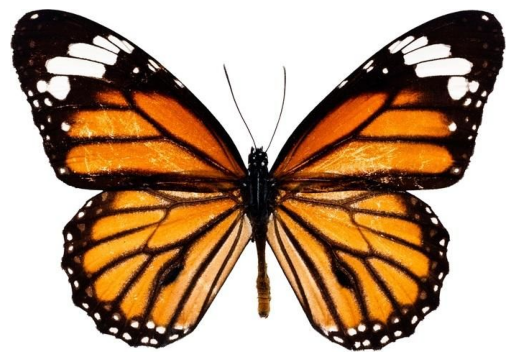

In [3]:
image = Image.open("./resources/Butterfly.jpg")

plt.imshow(image)
plt.axis('off')
plt.show()

image = np.array(image.convert('L'))

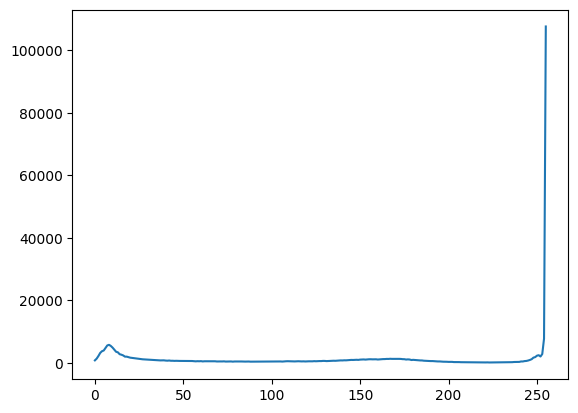

In [4]:
plt.plot(cv2.calcHist([image], [0], None, [256], [0, 256]))
plt.show()

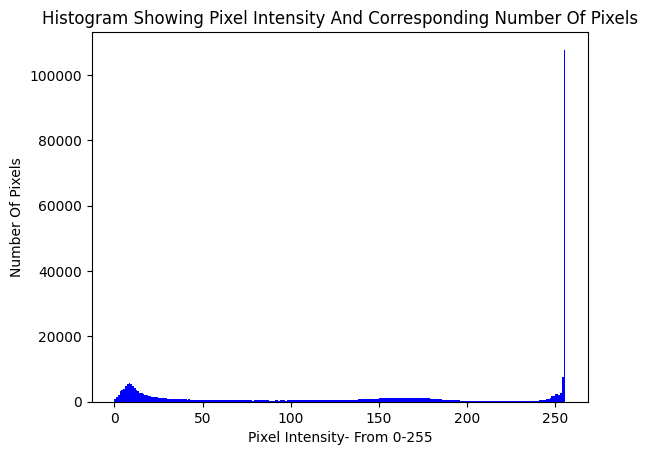

In [5]:
plt.hist(image.ravel(), 256, [0,256], color='blue')
plt.ylabel("Number Of Pixels")
plt.xlabel("Pixel Intensity- From 0-255")
plt.title("Histogram Showing Pixel Intensity And Corresponding Number Of Pixels")
plt.show()

# Modification


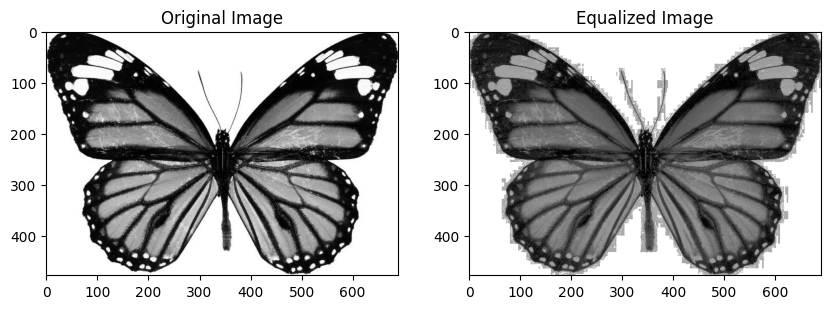

In [11]:
equ = cv2.equalizeHist(image)

# Display original and equalized image
plt.figure(figsize=(10,5))
plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(122), plt.imshow(equ, cmap='gray'), plt.title('Equalized Image')
plt.show()


# Equalization
- To Increase the contrast of the image

- Adaptive vs Non-Adaptive on Global and Local

[From here](https://pyimagesearch.com/2021/02/01/opencv-histogram-equalization-and-adaptive-histogram-equalization-clahe/#:~:text=Histogram%20equalization%20is%20a%20basic%20image%20processing%20technique%20that%20can,Our%20original%20input%20grayscale%20image.)

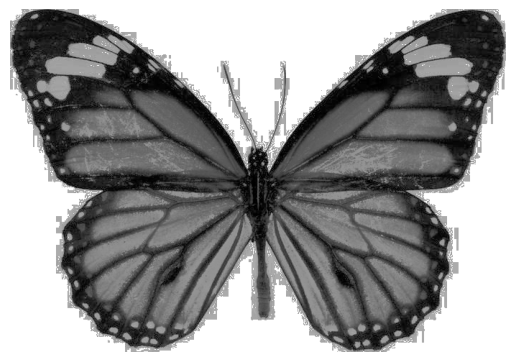

In [6]:
image_enhanced = cv2.equalizeHist(src = image)

plt.imshow(image_enhanced, cmap='gray')
plt.axis('off')
plt.show()


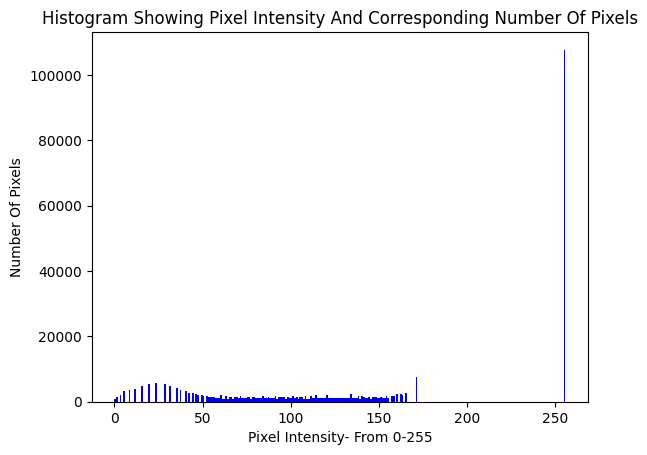

In [7]:
plt.hist(image_enhanced.ravel(), 256, [0,256], color='blue')
plt.ylabel("Number Of Pixels")
plt.xlabel("Pixel Intensity- From 0-255")
plt.title("Histogram Showing Pixel Intensity And Corresponding Number Of Pixels")
plt.show()

# Matching / Specification
[From here](https://www.geeksforgeeks.org/histogram-matching-with-opencv-scikit-image-and-python/)

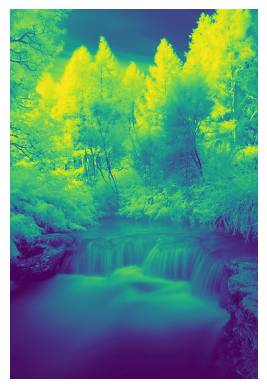

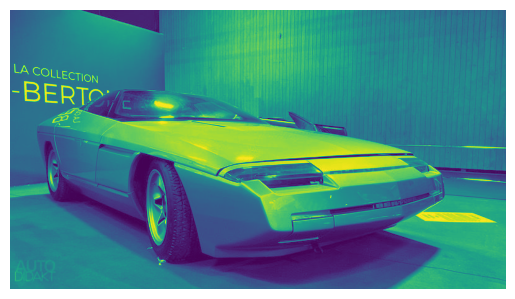

In [8]:
src_image = Image.open("./resources/forest.jpeg")
src_image = np.array(src_image.convert('L'))

plt.imshow(src_image)
plt.axis('off')
plt.show()


ref_image = Image.open("./resources/Car.jpeg")
ref_image = np.array(ref_image.convert('L'))

plt.imshow(ref_image)
plt.axis('off')
plt.show()


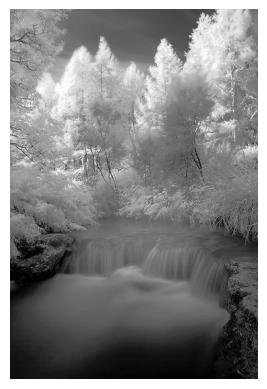

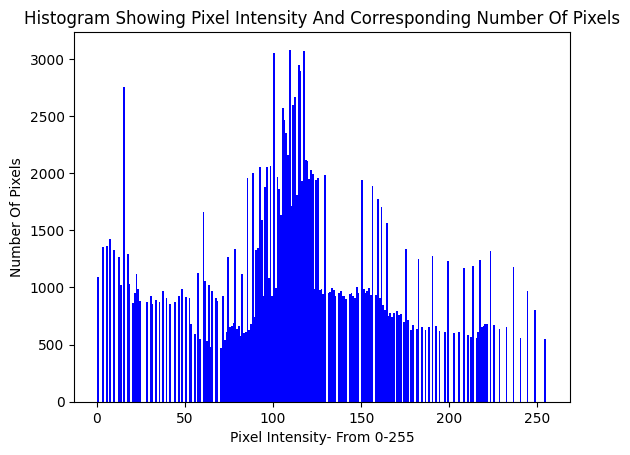

In [10]:
src_image_eq = cv2.equalizeHist(src_image)

# Calculate the histogram of the reference image
hist_ref = cv2.calcHist([ref_image], [0], None, [256], [0,256])

# Normalize the histogram
hist_ref = hist_ref / hist_ref.sum()

# Create a cumulative distribution function of the reference histogram
cdf_ref = hist_ref.cumsum()

# Map the pixel values of the source image to the pixel values of the reference image
src_image_matched = np.interp(src_image_eq.flatten(), cdf_ref * 255, np.arange(256))

# Reshape the result to the original image shape
src_image_matched = src_image_matched.reshape(src_image.shape)

plt.imshow(src_image_matched, cmap='gray')
plt.axis('off')
plt.show()

plt.hist(src_image_matched.ravel(), 256, [0,256], color='blue')
plt.ylabel("Number Of Pixels")
plt.xlabel("Pixel Intensity- From 0-255")
plt.title("Histogram Showing Pixel Intensity And Corresponding Number Of Pixels")
plt.show()
